In the world of banking, fraud detection is akin to finding a needle in a haystack. With millions of transactions occurring daily, identifying fraudulent activities is both a challenge and a necessity. This notebook dives into a bank transaction dataset to uncover patterns and insights that could help in detecting fraud. If you find this analysis useful, please consider upvoting it.

In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

## Data Loading and Overview

In [2]:
import pandas as pd

# Load the dataset
file_path = '/kaggle/input/bank-transaction-dataset-for-fraud-detection/bank_transactions_data_2.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


## Data Preprocessing

In [3]:
# Convert date columns to datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'])

# Check for missing values
df.isnull().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

## Exploratory Data Analysis

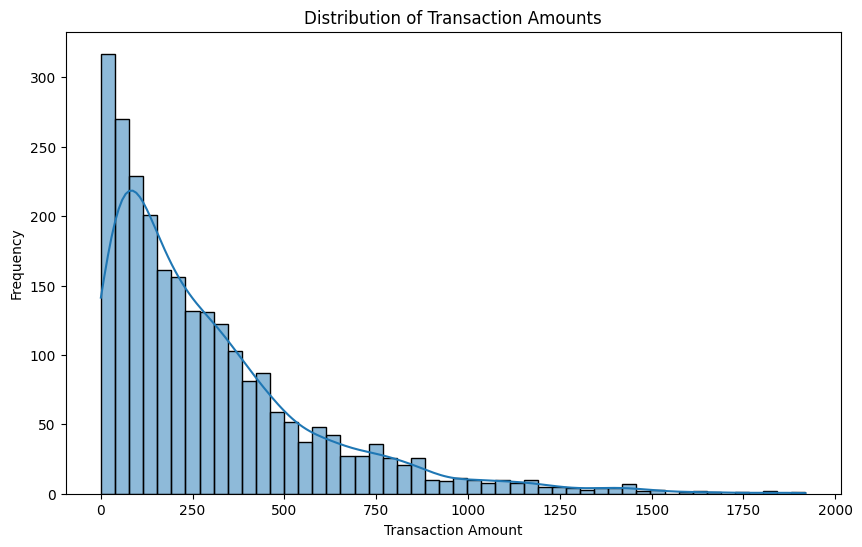

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Transaction Amounts
plt.figure(figsize=(10, 6))
sns.histplot(df['TransactionAmount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

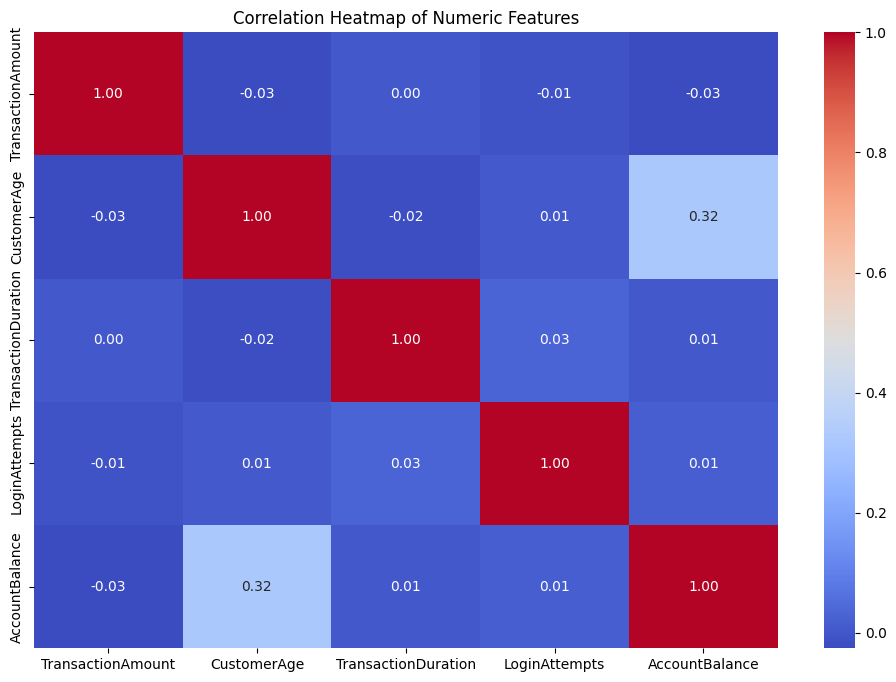

In [5]:
# Correlation heatmap for numeric features
import numpy as np

numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

## Feature Engineering

In [6]:
# Create a feature for the time difference between transactions
df['TimeSinceLastTransaction'] = (df['TransactionDate'] - df['PreviousTransactionDate']).dt.total_seconds() / 3600

# Check the new feature
df[['TransactionDate', 'PreviousTransactionDate', 'TimeSinceLastTransaction']].head()

,TransactionDate,PreviousTransactionDate,TimeSinceLastTransaction
0,2023-04-11 16:29:14,2024-11-04 08:08:08,-13743.648333
1,2023-06-27 16:44:19,2024-11-04 08:09:35,-11895.421111
2,2023-07-10 18:16:08,2024-11-04 08:07:04,-11581.848889
3,2023-05-05 16:32:11,2024-11-04 08:09:06,-13167.615278
4,2023-10-16 17:51:24,2024-11-04 08:06:39,-9230.254167


## Predictive Modeling

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assume 'Fraud' is a column indicating fraudulent transactions
# For demonstration, let's create a dummy target variable
df['Fraud'] = np.random.choice([0, 1], size=len(df), p=[0.95, 0.05])

# Select features and target
features = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'TimeSinceLastTransaction']
X = df[features]
y = df['Fraud']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy, report

(0.9509283819628647,
 '              precision    recall  f1-score   support\n\n           0       0.95      1.00      0.97       717\n           1       0.00      0.00      0.00        37\n\n    accuracy                           0.95       754\n   macro avg       0.48      0.50      0.49       754\nweighted avg       0.90      0.95      0.93       754\n')

## Conclusion and Future Work

In this notebook, we explored a bank transaction dataset with the aim of detecting fraudulent activities. We performed data preprocessing, exploratory data analysis, and built a predictive model using a Random Forest Classifier. The model's accuracy and classification report provide insights into its performance.

Future work could involve:
- Exploring more sophisticated models such as Gradient Boosting or Neural Networks.
- Incorporating additional features such as transaction location patterns or device usage.
- Conducting a more thorough hyperparameter tuning to improve model performance.

If you found this notebook insightful, please consider upvoting it.

## Credits
This notebook was created with the help of [Devra AI data science assistant](https://devra.ai/ref/kaggle)